In [148]:
%matplotlib inline
import sys
sys.path.append('../')
from src.LRGSG_package.LRGSG import *

In [152]:
N = 100
Navg = 2
p = 0.1
G = nx.erdos_renyi_graph(N, p, seed=None, directed=False)

100%|██████████| 1000/1000 [00:00<00:00, 19803.88it/s]


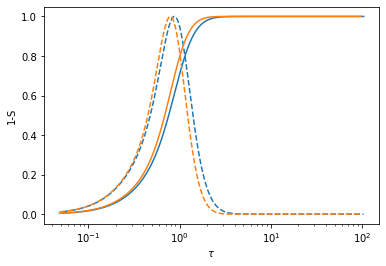

In [153]:
rmax = 2
t1Sm1Avg = []
for r in [i/rmax for i in range(rmax)]:
    G = nx.erdos_renyi_graph(N, p, seed=None, directed=False)
    labelList = [i for i in range(G.number_of_nodes())]
    for e in G.edges():
        G.add_edge(e[0], e[1], weight=1)
        if np.random.random(1) < 0.01:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label='ER-05')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
             color=plt.gca().lines[-1].get_color())

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')

plt.xscale('log')


In [154]:
lenLs = 1000
a = np.zeros(lenLs)
all_t1 = np.concatenate([i[0] for i in t1Sm1Avg])
commonLs = np.logspace(np.log10(min(all_t1)), np.log10(max(all_t1)), lenLs)
for tS in t1Sm1Avg:
    np.add.at(a, np.digitize(tS[0], bins=commonLs)-1, tS[1])
b = np.concatenate([np.digitize(tS[0], bins=commonLs)-1 for tS in t1Sm1Avg])
unique, counts = np.unique(b, return_counts=True)
a /= counts 

In [155]:
a

array([0.0045679 , 0.00467031, 0.00473993, 0.00481056, 0.00488222,
       0.00495493, 0.0050287 , 0.00510355, 0.0051795 , 0.00500005,
       0.00507444, 0.00514991, 0.00522647, 0.00530416, 0.00538297,
       0.00546294, 0.00554406, 0.00562637, 0.00570987, 0.00579459,
       0.00588053, 0.00596772, 0.00605618, 0.00614592, 0.00623696,
       0.00632932, 0.00642302, 0.00651807, 0.00661449, 0.00671231,
       0.00681154, 0.0069122 , 0.00701431, 0.0071179 , 0.00722297,
       0.00732956, 0.00743769, 0.00754737, 0.00765862, 0.00777147,
       0.00788594, 0.00800206, 0.00811983, 0.0082393 , 0.00836047,
       0.00848337, 0.00860804, 0.00873448, 0.00886273, 0.00899281,
       0.00912474, 0.00925855, 0.00939426, 0.00953191, 0.00967151,
       0.00981309, 0.00995668, 0.01010231, 0.01025   , 0.01039978,
       0.01055168, 0.01070573, 0.01086195, 0.01102038, 0.01118104,
       0.01120376, 0.01158875, 0.01175741, 0.01192844, 0.01210188,
       0.01227774, 0.01245607, 0.01263689, 0.01282025, 0.01300

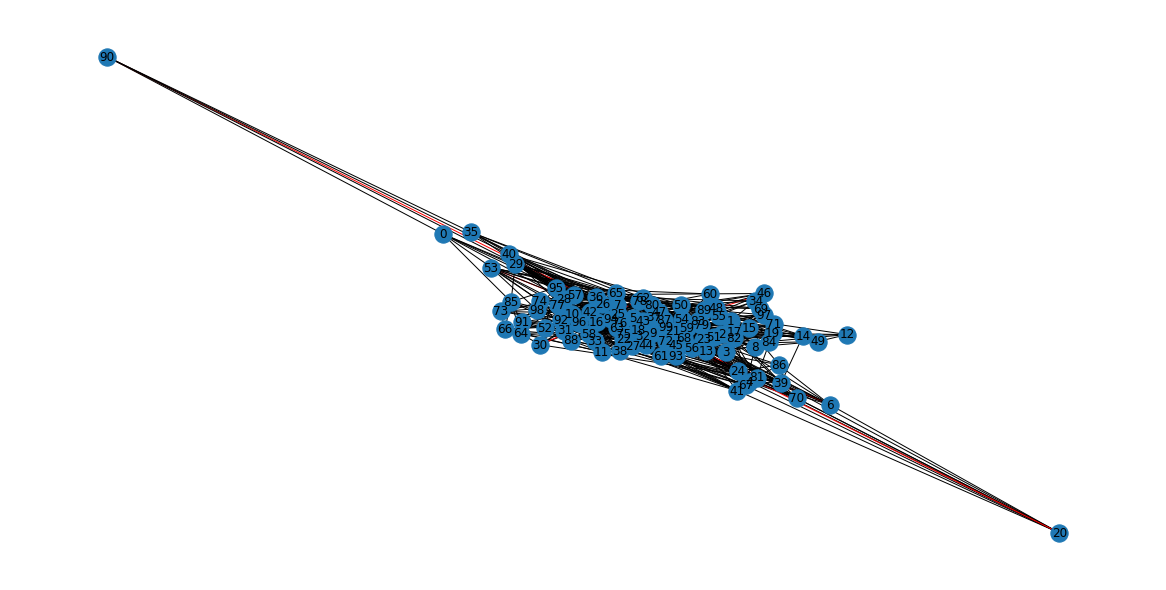

In [ ]:
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u, v in G.edges()]
plt.figure(figsize=(16, 8))
nx.draw(G, edge_color=colors, node_size=300, with_labels=True)


In [ ]:
# laplacian, spectrum and densities
linkage_matrix, w = MakeLinkageMatrix(
    G, tau=1e2, is_signed=True, method="ward")
#
tmin = linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
tmax = linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]

In [ ]:
G.get_edge_data(0, 3), G.get_edge_data(8, 9)

(None, None)

In [ ]:
# utils
tresh = 0.1
dentroOpts = {'leaf_rotation': 0,
              'orientation': 'right',
              'color_threshold': tresh,
              'above_threshold_color': 'k',
              'leaf_font_size': 10,
              'labels': labelList}


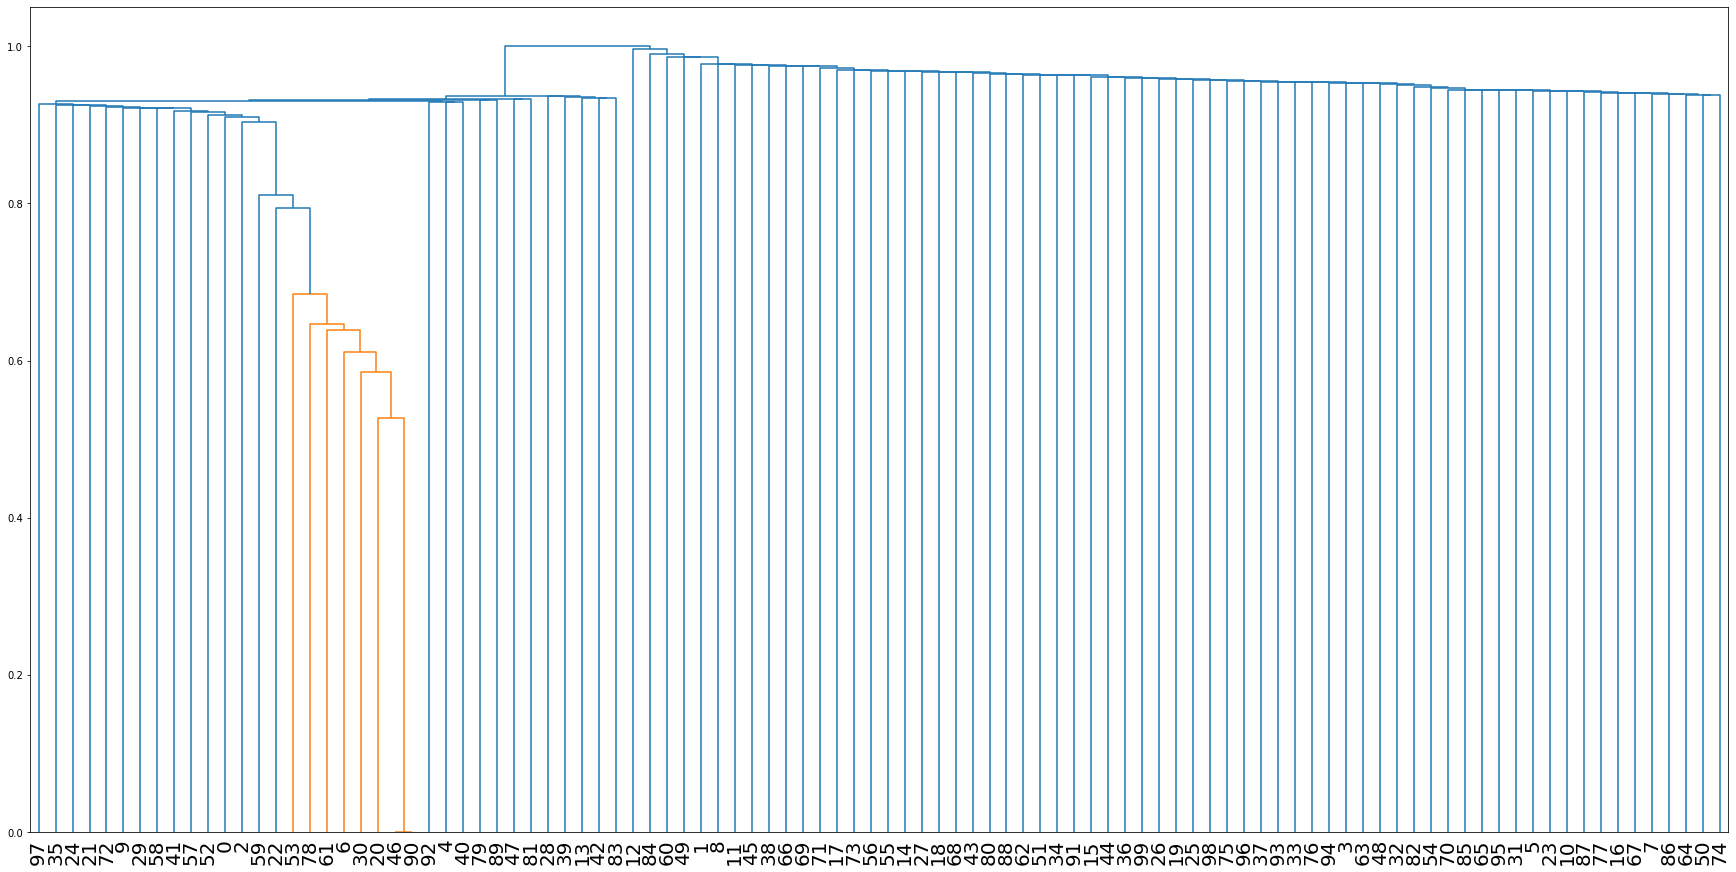

In [ ]:
ax_dict = plt.figure(constrained_layout=True,
                     figsize=(24, 12)).subplot_mosaic("A")

dendrogram(linkage_matrix, labels=labelList, ax=ax_dict['A'], leaf_font_size=20)
# CM = fcluster(linkage_matrix, t=0.6, criterion='distance')
# cmap = build_colormap(MiscPalette.TONKA, True)
# cmap1 = cmap(np.linspace(0, 1, np.max(CM)))
# cmap1[0]=[0., 175/255., 187/255., 1.]
# cmap1[1]=[252/255., 78/255., 7/255., 1.]
# hierarchy.set_link_color_palette([mplc.rgb2hex(rgb[:3]) for rgb in cmap1])
# ax_dict['A'].axvline(x=tresh, color='#ED2939', linestyle='--')
# ax_dict['A'].set_xlim(tmin, tmax)

# ax_dict['A'].set_xlabel(r'$\mathcal{D}/\mathcal{D}_{max}$')
# ax_dict['A'].set_ylabel('Node index')
# ax_dict['A'].set_yscale('log')
# ax_dict['A'].set_xticks([1e0])


plt.show()


In [ ]:
2**13

8192

In [ ]:
lsN = np.array([2**i for i in range(8, 13)])
Navg = 4*np.array([2**(13-i) for i in range(8, 13)])
lsp = np.array([[((1+i)*N)/(10*N) for i in range(9)] for N in lsN])

In [ ]:
2**8

256

In [ ]:
no_rw = 7

lsrw = np.array([[((1+i)*N)/(no_rw*N) for i in range(no_rw-1)] for N in lsN])

In [ ]:
lsrw

array([[0.14285714, 0.28571429, 0.42857143, 0.57142857, 0.71428571,
        0.85714286],
       [0.14285714, 0.28571429, 0.42857143, 0.57142857, 0.71428571,
        0.85714286],
       [0.14285714, 0.28571429, 0.42857143, 0.57142857, 0.71428571,
        0.85714286],
       [0.14285714, 0.28571429, 0.42857143, 0.57142857, 0.71428571,
        0.85714286],
       [0.14285714, 0.28571429, 0.42857143, 0.57142857, 0.71428571,
        0.85714286]])

In [ ]:
lsrw = np.array([((1+i))/(no_rw) for i in range(no_rw-1)])


In [ ]:
lsrw

array([0.14285714, 0.28571429, 0.42857143, 0.57142857, 0.71428571,
       0.85714286])

In [ ]:
np.random.random()

0.11329364701539535

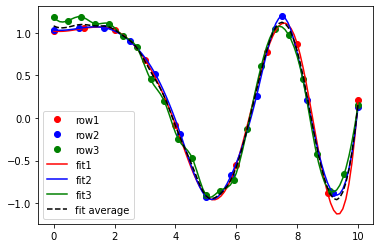

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# make up three datasets for testing
x1 = np.linspace(0, 10, num=11, endpoint=True)
x2 = np.linspace(0, 10, num=13, endpoint=True)
x3 = np.linspace(0, 10, num=23, endpoint=True)

y1 = np.cos(-x1**2/9.0) + 0.2*np.random.rand((len(x1)))
y2 = np.cos(-x2**2/9.0) + 0.2*np.random.rand((len(x2)))
y3 = np.cos(-x3**2/9.0) + 0.2*np.random.rand((len(x3)))

# interpolate data
f1 = interp1d(x1, y1,'cubic')
f2 = interp1d(x2, y2,'cubic')
f3 = interp1d(x3, y3,'cubic')

# define common carrier for calculation of average curve
x_all = np.linspace(0, 10, num=101, endpoint=True)

# evaluation of fits on common carrier
f1_int = f1(x_all)
f2_int = f2(x_all)
f3_int = f3(x_all)

# put all fits to one matrix for fast mean calculation
data_collection = np.vstack((f1_int,f2_int,f3_int))

# calculating mean value
f_avg = np.average(data_collection, axis=0)

# plot this example
plt.figure()
plt.plot(x1,y1,'ro',label='row1')
plt.plot(x2,y2,'bo',label='row2')
plt.plot(x3,y3,'go',label='row3')

plt.plot(x_all,f1_int,'r-',label='fit1')
plt.plot(x_all,f2_int,'b-',label='fit2')
plt.plot(x_all,f3_int,'g-',label='fit3')

plt.plot(x_all, f_avg,'k--',label='fit average')
plt.legend(loc=3)

plt.show()

In [ ]:
t = [[np.random.uniform(low=low, high=low+1, size=int(np.random.uniform(1, 4, 1))) for low in range(0, 10, 2)] for i in range(10)]

In [ ]:
t

[[array([0.72677471, 0.87021213]),
  array([2.35128854, 2.02940625, 2.03081228]),
  array([4.54980045, 4.61029275]),
  array([6.77866941, 6.6663768 ]),
  array([8.40115555])],
 [array([0.47485114]),
  array([2.1035158]),
  array([4.15876887, 4.16884513]),
  array([6.56729414, 6.3676446 ]),
  array([8.07350502, 8.5203671 ])],
 [array([0.3732487 , 0.79361354]),
  array([2.29841768, 2.3670649 ]),
  array([4.80406537, 4.19548118, 4.97964034]),
  array([6.40110475, 6.71173384]),
  array([8.86939319, 8.78413318, 8.94172065])],
 [array([0.53238477, 0.75571581]),
  array([2.07048926, 2.51522547]),
  array([4.22275414, 4.90080767, 4.51574895]),
  array([6.0772484 , 6.46559751, 6.63788767]),
  array([8.34838329])],
 [array([0.14769848]),
  array([2.13029952, 2.12506444]),
  array([4.84972956, 4.83106794, 4.9427531 ]),
  array([6.02237113, 6.56229933]),
  array([8.16722112, 8.95128119, 8.72621402])],
 [array([0.96488015]),
  array([2.30882643, 2.10020917, 2.00106723]),
  array([4.18987684, 4.5468